In [3]:
import os
import pandas as pd
import h5py as h5
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
from mpl_toolkits import mplot3d

In [4]:
path_dir: str = r"/home/svergani/monitoring/files/rmsm_display_0/"

In [5]:
#I start by opening one file and check how many channels are stored there
f = h5.File(os.sep.join([path_dir, "rmsm_display-0-220525-151538.hdf5"]), "r")
channels = np.array(f.get('data/axis0').value)

In [6]:
####I create an array containing: x-row related to the x measurements and y-columns related to the y-channels

In [7]:
directory = os.fsencode(path_dir)
rmsm = []
    
for file in os.listdir(directory):
    filename = os.fsdecode(file)
    if filename.endswith(".hdf5"): 
        df = pd.read_hdf(os.sep.join([path_dir, filename]))
        temp = []
        for i in range(channels.size):
            temp.append(df.iat[0,i])
        rmsm.append(temp)
        continue
    else:
        continue

rmsm = np.array(rmsm)

In [ ]:
####this takes forever I am not sure if I need it

rmsm_transpose = []
for i in range(channels.size):
    temp = []
    for file in os.listdir(directory):
        filename = os.fsdecode(file)
        if filename.endswith(".hdf5"): 
            df = pd.read_hdf(os.sep.join([path_dir, filename]))
            temp.append(df.iat[0,i])        
    rmsm_transpose.append(temp)
    
rmsm_transpose = np.array(rmsm_transpose)

In [8]:
#Set default figure size
mpl.rcParams['figure.figsize'] = [30, 20]
mpl.rcParams["legend.frameon"] = False
mpl.rcParams.update({'font.size': 22})

Text(0.5,1,'Distribution of RMSM for Channel 3 over time')

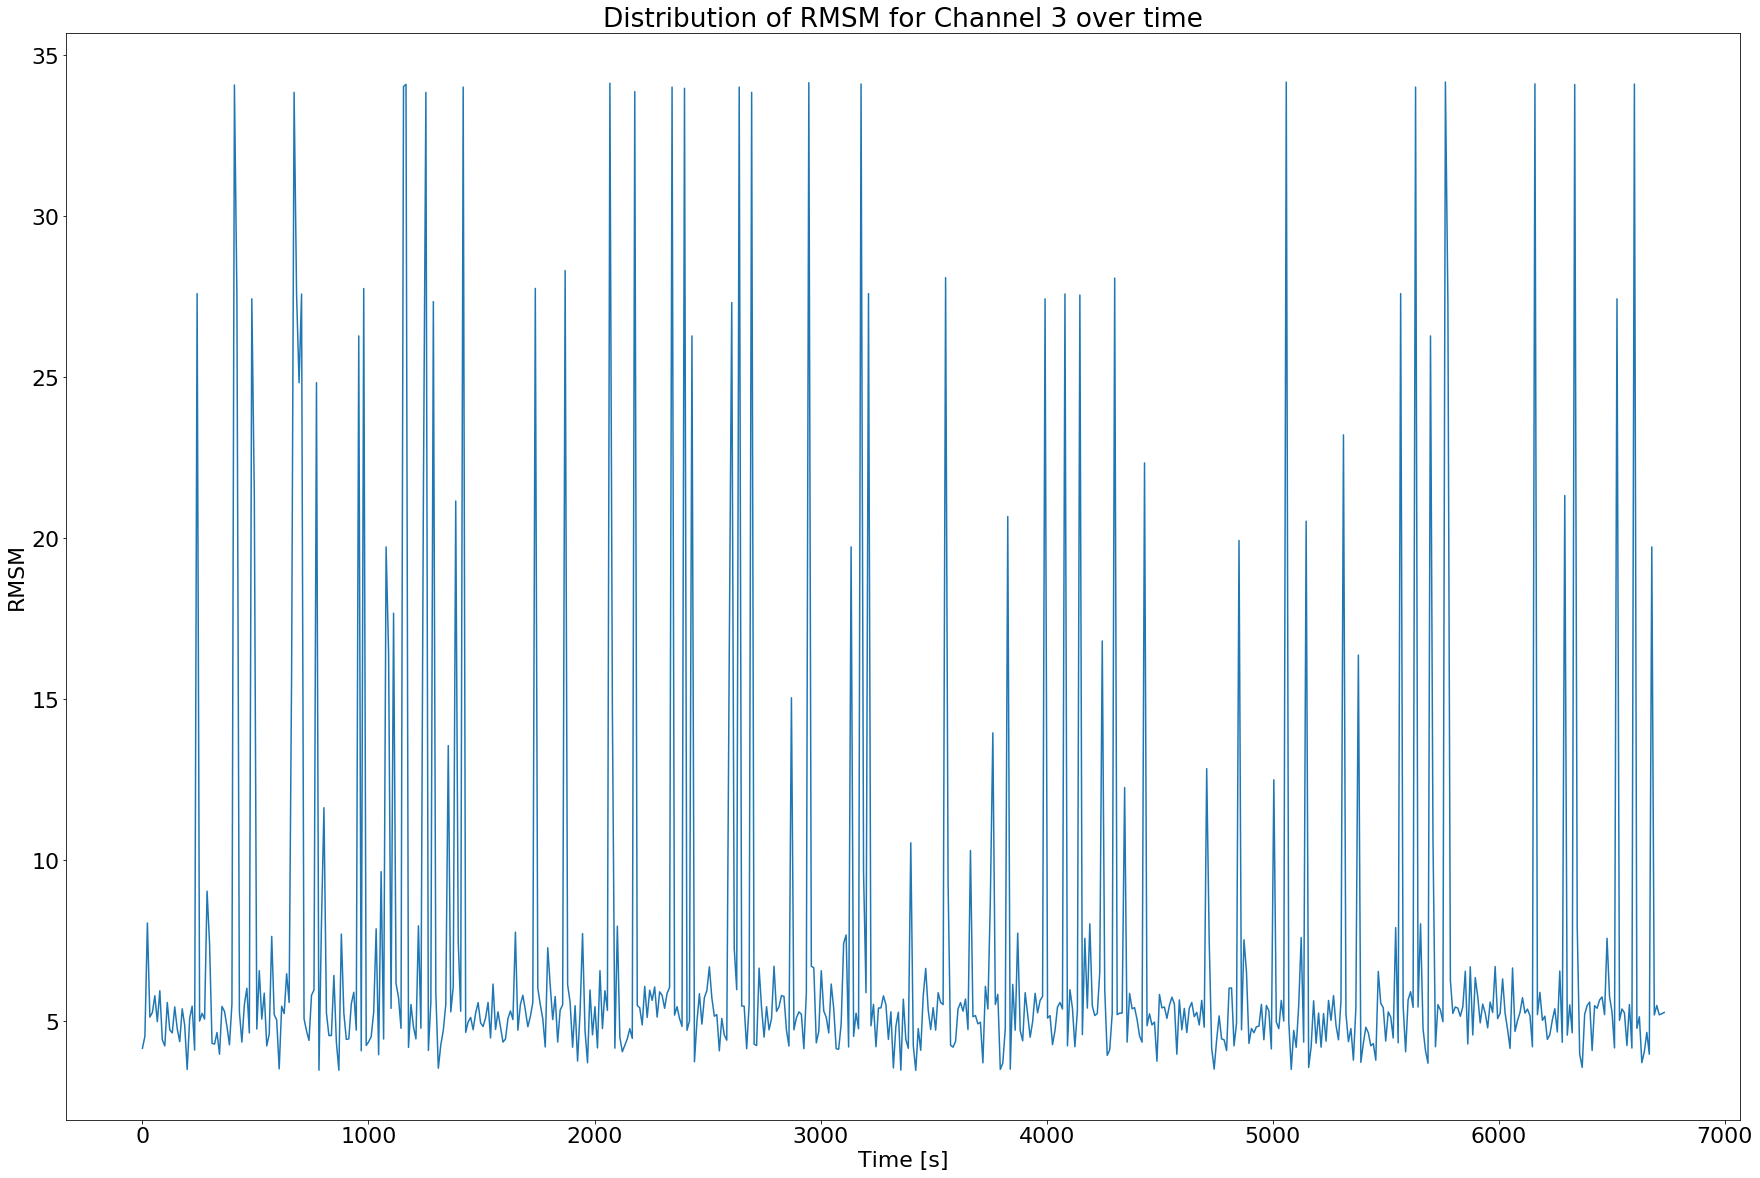

In [9]:
time = np.arange(rmsm.shape[0])*11
#Plot the first waveforms
fig, ax = plt.subplots()
ax.plot(time,rmsm[:,3],label="Input Pulse")
ax.set_xlabel("Time [s]")
ax.set_ylabel("RMSM")
ax.set_title("Distribution of RMSM for Channel 3 over time")

Text(0.5,1,'Distribution of RMSM for All Channels over time')

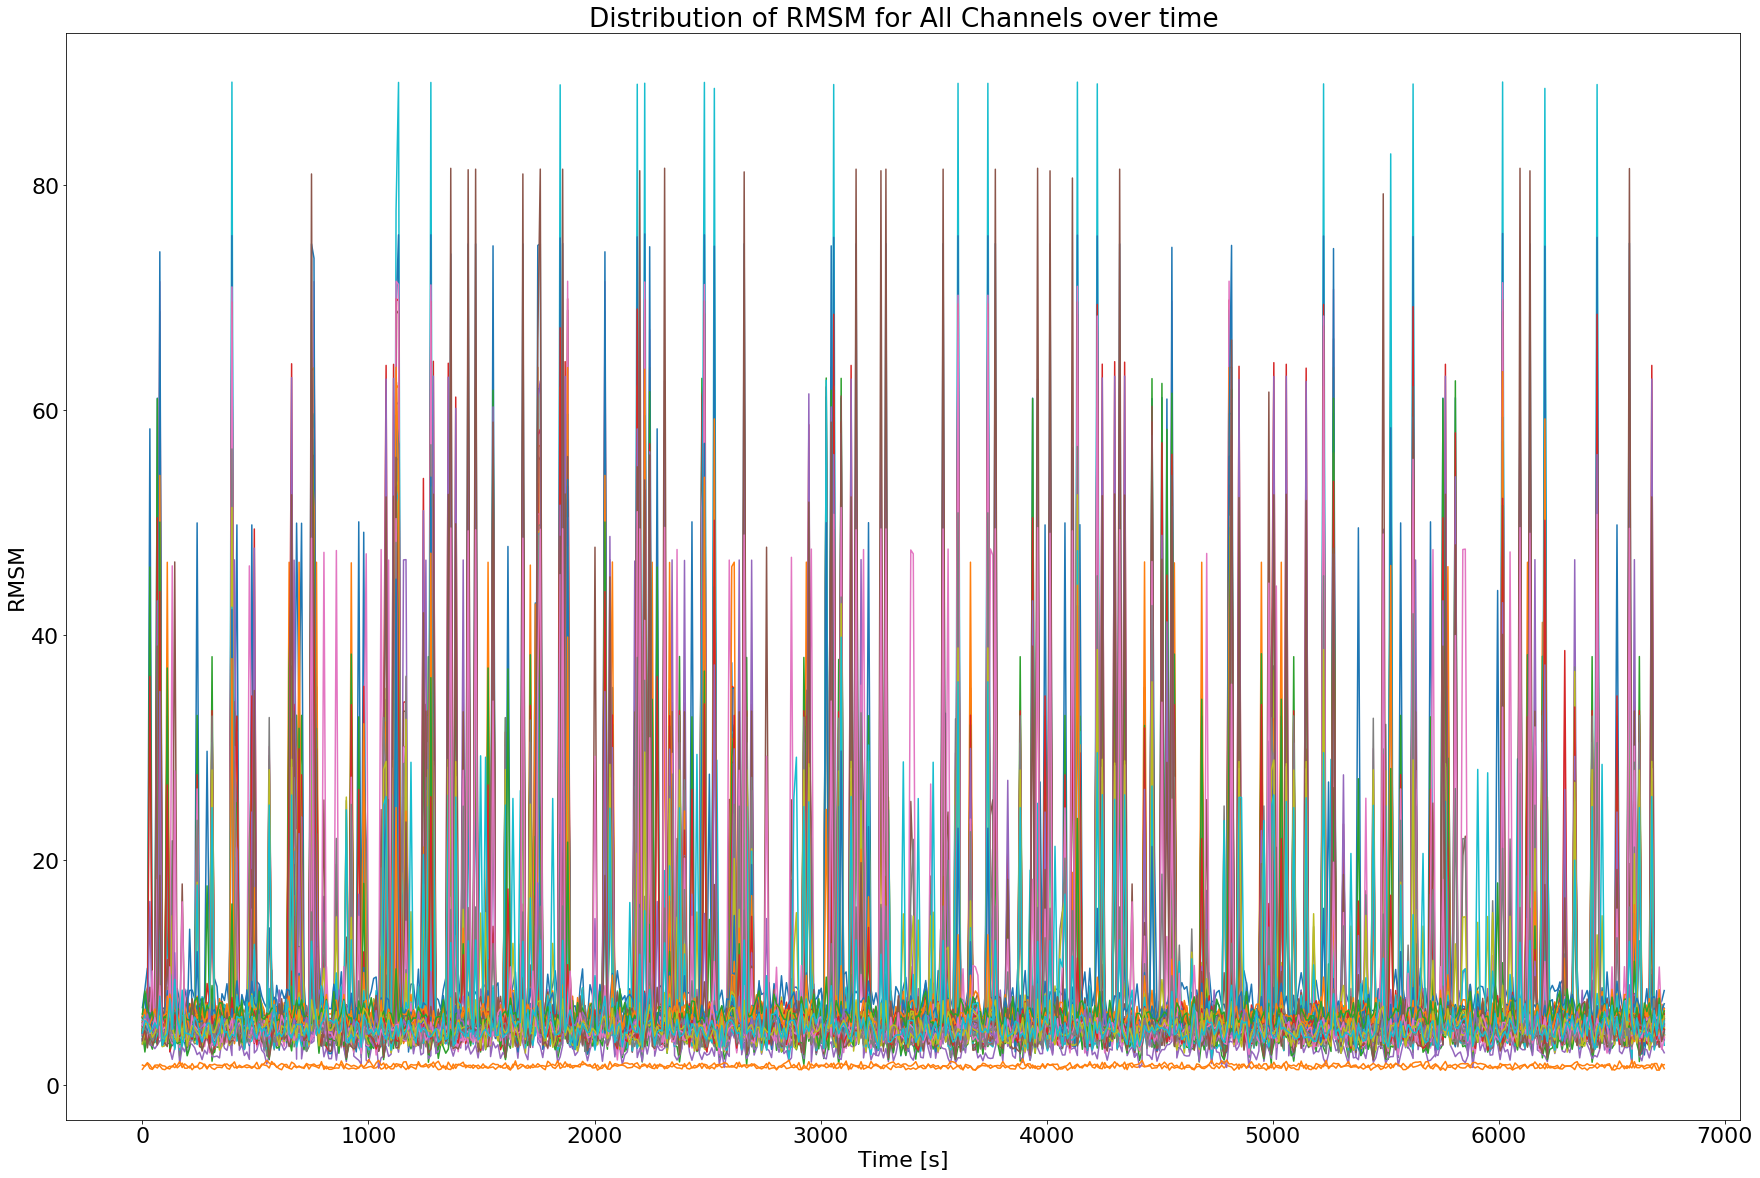

In [10]:
#Plot all channels together
fig, ax = plt.subplots()
for i in range(rmsm.shape[1]):
    ax.plot(time,rmsm[:,i],label=i)
ax.set_xlabel("Time [s]")
ax.set_ylabel("RMSM")
ax.set_title("Distribution of RMSM for All Channels over time")

In [11]:
#I create an array with the channel number for plotting

channels_3d = []
for i in range(np.amin(channels),np.amax(channels)):
    channels_3d.append(np.ones(time.size)*i)
channels_3d = np.array(channels_3d)

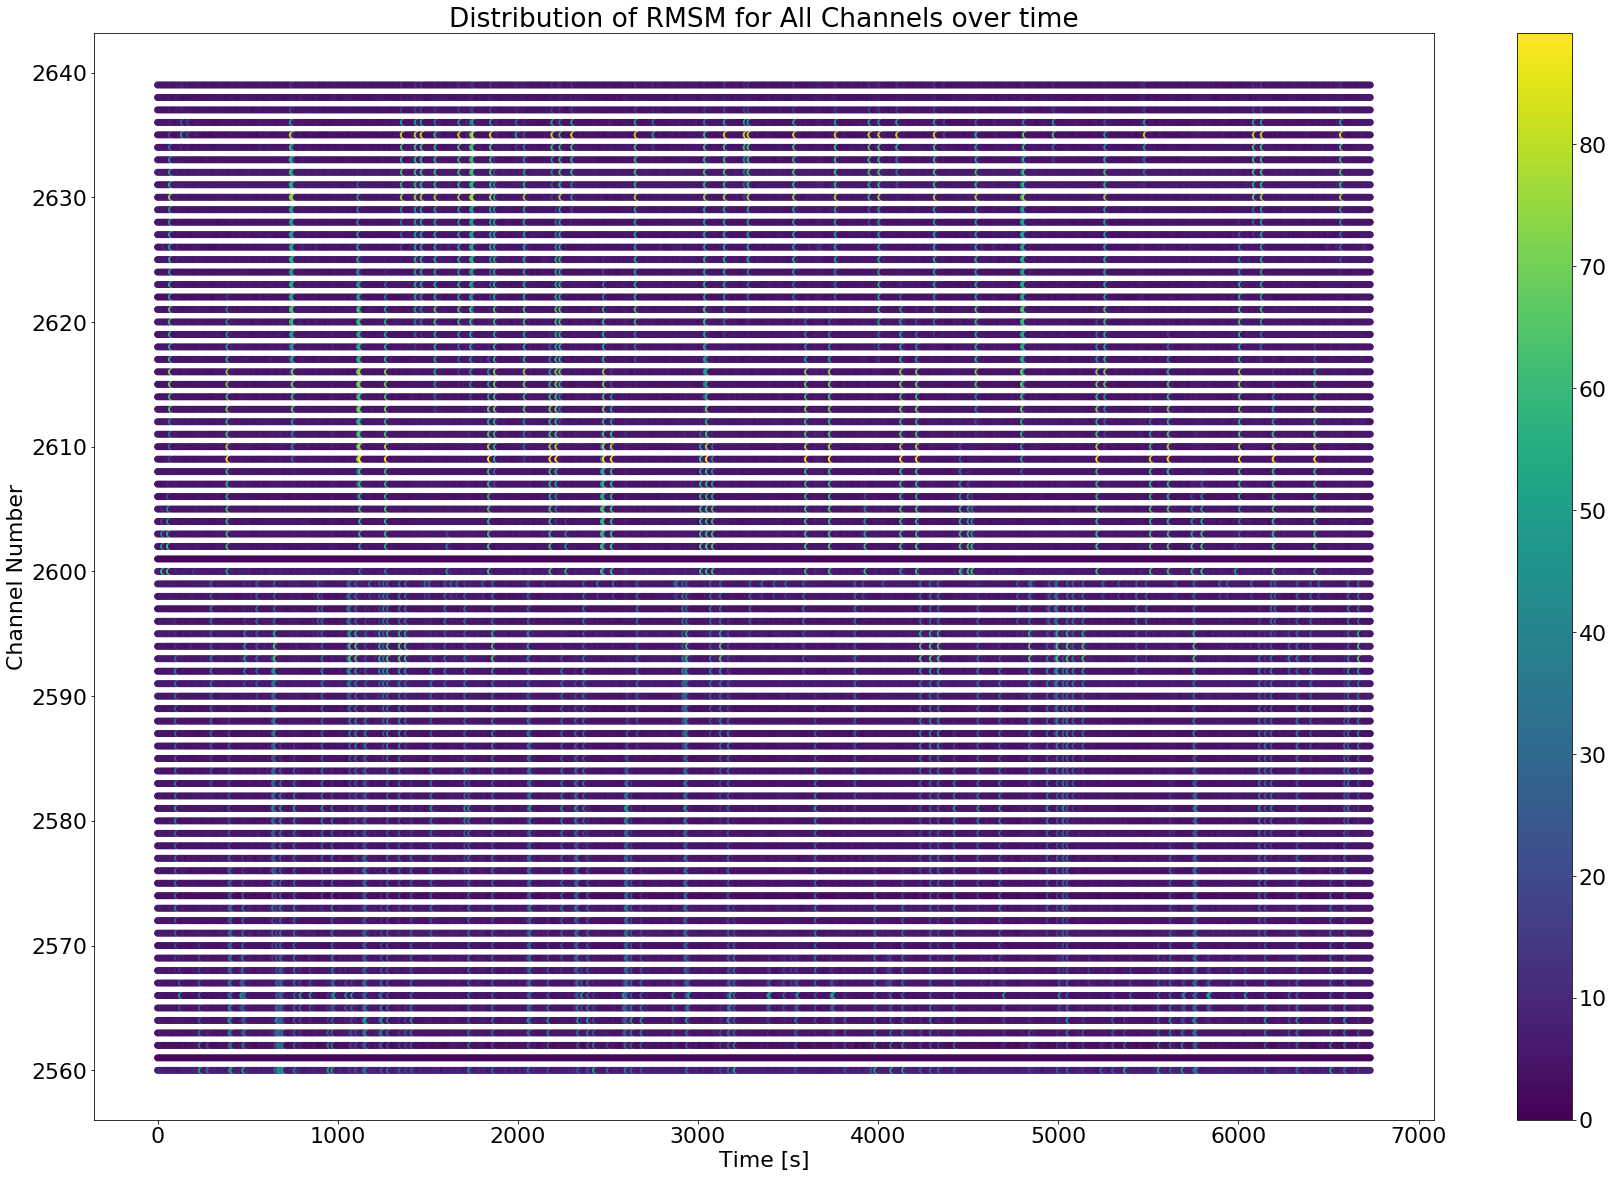

In [12]:
###I want the colour scale to be related to the channel with the highest value.
#I loop over all channel looking for the highest value of rmsm

fig, ax = plt.subplots()
highest_value = 0
for i in range(rmsm.shape[1]):
    if(np.amax(rmsm[:,i])>highest_value):
        highest_value=np.amax(rmsm[:,i])
for i in range(rmsm.shape[1]):
    sc=ax.scatter(time, channels_3d[i,:], c=rmsm[:,i],vmin=0, vmax=highest_value)
    
normalize = mpl.colors.Normalize(vmin=0, vmax=highest_value)                            
cbar = fig.colorbar(sc)
ax.set_xlabel("Time [s]")
ax.set_ylabel("Channel Number")
ax.set_title("Distribution of RMSM for All Channels over time")
plt.show()


In [27]:
# I create a hdf5 file containing the rmsm over the different measurements
# I initialise a new file

path_dir_target: str = r"/home/svergani/monitoring/hdf5_created_files"
hf_target = h5.File(os.sep.join([path_dir_target, "rmsm_display_0_2022_05_22.hdf5"]), 'w')

In [28]:
hf_target.create_dataset('rmsm', data=rmsm)

<HDF5 dataset "rmsm": shape (613, 80), type "<f8">

In [29]:
hf_target.close()

In [30]:
f_2 = h5.File(os.sep.join([path_dir_target, "rmsm_display_0_2022_05_22.hdf5"]), "r")

In [31]:
# Get and print list of datasets within the H5 file
datasetNames = [n for n in f_2.keys()]
for n in datasetNames:
    print(n)

rmsm
